# Jeopardy Categories Summary:

Team 13, Project 1: I chose to analyze the occurrence of categories from a dataset of Jeopardy questions. The dataset was a .tsv file found on Kaggle. It includes data from Jeopardy seasons 1-35 and about 350,000 questions and answers. 

### *Question #1: What are the Top 5 Categories in Jeopardy?*
By sorting the data & plotting, it showed the most numerous category was Science. It was only about 2% of the categories. The other top 5 categories were: Literature, American History, History & Sports. The total category count was 43,369. Any related categories were treated as unique since the vast numbers of categories prevented easy consolidating into general topics. These top 5 overall categories are very general.


### *Question #2: Do Categories Change Between Rounds 1&2 Versus The Final Round?*
Since Jeopardy does get more difficult from rounds 1 & 2 to the final round, do the categories follow with the overall or do they become more difficult? The top 4 of the rounds 1 & 2 are the same as the overall (Science, Literature, American History, History) with the addition of Potpourri (in place of Sports on the overall). Rounds 1 & 2 also have the most numerous questions available. The top category of Science in rounds 1 & 2 is also 2% of the total.
The final round overall category is US Presidents. It is 2.6% of the total categories in the final round. The other top 5 categories are: Word Origins, State Capitols, Authors & The Oscars. These categories appear more focused as compared to big topics of rounds 1 & 2 like science or history, which makes sense for the more difficult/higher value questions.

### *Question #3: Do Categories Change Between the 4 decades of the show airing (1984-2019)?* <br>
The air dates were divided into the decades (80s, 90s, 2000s, & 2010s), categories were then tallied & plotted to determine if there were any differences. <br>
The 80s (1984-1989) top 5 categories were: Sports, Science, Business & Industry, US History, Animals <br>
The 90s (1990-1999) top 5 categories were: Literature, World Geography, History, Science, American History <br>
The 2000s (2000-2009) top 5 categories were: Before & After, Stupid Answers, Word Origins, Bodies of Water, Science <br>
The 2010s (2010-2019) top 5 categories were: American History, Nonfiction, Word Origins, Potpourri, Pop Culture <br>
<br>
The decades mostly follow the overall categories of science, history, literature. The outlier decade that was different was the 2000s (2000-2009) with the categories of "Before & After" and "Stupid Answers". These represent the popular trends of those years. The "Before & After" category was 2% of that decade's categories, compared with: 80s top "Sports" with 11%, 90s top "Literature" with 5%, 2010s top "American History" was almost 1%. <br>
One conclusion could be that when the show started airing the categories were more general and as the years progressed, more specific categories were constructed to test the knowledge of the contestants. The percentage of the top categories show this by the lower numbers in the 2000s and 2010s. <br>



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Read the original data files (.tsv files)
jeopardy_adult_df= pd.read_csv('master_season1-35.tsv', sep='\t')
jeopardy_adult_df


round  value daily_double        category comments  \
0           1    100           no  LAKES & RIVERS        -   
1           1    200           no  LAKES & RIVERS        -   
2           1    400           no  LAKES & RIVERS        -   
3           1    500           no  LAKES & RIVERS        -   
4           1    100           no      INVENTIONS        -   
...       ...    ...          ...             ...      ...   
349636      2    400           no  MAKE IT SNAPPY        -   
349637      2    800           no  MAKE IT SNAPPY        -   
349638      2   1600           no  MAKE IT SNAPPY        -   
349639      2   2000           no  MAKE IT SNAPPY        -   
349640      3      0           no  HISTORIC SHIPS        -   

                                                   answer  \
0                 River mentioned most often in the Bible   
1                                  Scottish word for lake   
2       American river only 33 miles shorter than the ...   
3       World's largest lake, nearly 5 times as big as...   
4                            Marconi's wonderful wireless   
...                                                   ...   
349636  As well as photosharing on this app, you can w...   
349637  Genus Antirrhinum, these flowers snap closed a...   
349638  This hyphenated tool company owns brands like ...   
349639  In 2019 meteorologist Daryl Ritchison at NDSU,...   
349640  215 passengers were rescued when it sank in Ju...   

                             question    air_date notes  
0                          the Jordan  1984-09-10     -  
1                                loch  1984-09-10     -  
2                        the Missouri  1984-09-10     -  
3                     the Caspian Sea  1984-09-10     -  
4                           the radio  1984-09-10     -  
...                               ...         ...   ...  
349636                       Snapchat  2019-07-26     -  
349637                    snapdragons  2019-07-26     -  
349638                        Snap-On  2019-07-26     -  
349639  North Dakota State University  2019-07-26     -  
349640                  the Carpathia  2019-07-26     -  

[349641 rows x 9 columns]

In [2]:
# Read the data files, change air_date to a date to use for sorting & making it the index
jeopardy_df= pd.read_csv('master_season1-35.tsv', sep='\t', infer_datetime_format=True, parse_dates=True, index_col="air_date")
jeopardy_df

round  value daily_double        category comments  \
air_date                                                         
1984-09-10      1    100           no  LAKES & RIVERS        -   
1984-09-10      1    200           no  LAKES & RIVERS        -   
1984-09-10      1    400           no  LAKES & RIVERS        -   
1984-09-10      1    500           no  LAKES & RIVERS        -   
1984-09-10      1    100           no      INVENTIONS        -   
...           ...    ...          ...             ...      ...   
2019-07-26      2    400           no  MAKE IT SNAPPY        -   
2019-07-26      2    800           no  MAKE IT SNAPPY        -   
2019-07-26      2   1600           no  MAKE IT SNAPPY        -   
2019-07-26      2   2000           no  MAKE IT SNAPPY        -   
2019-07-26      3      0           no  HISTORIC SHIPS        -   

                                                       answer  \
air_date                                                        
1984-09-10            River mentioned most often in the Bible   
1984-09-10                             Scottish word for lake   
1984-09-10  American river only 33 miles shorter than the ...   
1984-09-10  World's largest lake, nearly 5 times as big as...   
1984-09-10                       Marconi's wonderful wireless   
...                                                       ...   
2019-07-26  As well as photosharing on this app, you can w...   
2019-07-26  Genus Antirrhinum, these flowers snap closed a...   
2019-07-26  This hyphenated tool company owns brands like ...   
2019-07-26  In 2019 meteorologist Daryl Ritchison at NDSU,...   
2019-07-26  215 passengers were rescued when it sank in Ju...   

                                 question notes  
air_date                                         
1984-09-10                     the Jordan     -  
1984-09-10                           loch     -  
1984-09-10                   the Missouri     -  
1984-09-10                the Caspian Sea     -  
1984-09-10                      the radio     -  
...                                   ...   ...  
2019-07-26                       Snapchat     -  
2019-07-26                    snapdragons     -  
2019-07-26                        Snap-On     -  
2019-07-26  North Dakota State University     -  
2019-07-26                  the Carpathia     -  

[349641 rows x 8 columns]

In [3]:
#delete un-needed columns for my category questions
jeopardy_df.drop('comments', axis=1, inplace=True)
jeopardy_df.drop('notes', axis=1, inplace=True)
jeopardy_df.drop('value', axis=1, inplace=True)
jeopardy_df.drop('daily_double', axis=1, inplace=True)
jeopardy_df.drop('answer', axis=1, inplace=True)
jeopardy_df.drop('question', axis=1, inplace=True)

jeopardy_df

round        category
air_date                         
1984-09-10      1  LAKES & RIVERS
1984-09-10      1  LAKES & RIVERS
1984-09-10      1  LAKES & RIVERS
1984-09-10      1  LAKES & RIVERS
1984-09-10      1      INVENTIONS
...           ...             ...
2019-07-26      2  MAKE IT SNAPPY
2019-07-26      2  MAKE IT SNAPPY
2019-07-26      2  MAKE IT SNAPPY
2019-07-26      2  MAKE IT SNAPPY
2019-07-26      3  HISTORIC SHIPS

[349641 rows x 2 columns]

In [4]:
#separate out the final round (3) rows & save as dataframe for later use
finals_df = jeopardy_df.loc[jeopardy_df["round"] == 3]
finals_df

round             category
air_date                              
1984-09-10      3             HOLIDAYS
1984-09-11      3         THE CALENDAR
1984-09-12      3             LANGUAGE
1984-09-13      3  AMERICAN GOVERNMENT
1984-09-14      3         THE OLYMPICS
...           ...                  ...
2019-07-22      3            LANDMARKS
2019-07-23      3         TOYS & GAMES
2019-07-24      3   CHILDREN'S AUTHORS
2019-07-25      3  1970s ALBUM REVIEWS
2019-07-26      3       HISTORIC SHIPS

[6206 rows x 2 columns]

In [5]:
#separate out the Rounds 1 & 2 rows & save as dataframe for later use
early_df = jeopardy_df.loc[(jeopardy_df["round"] == 1) | (jeopardy_df["round"] == 2)]
early_df

round                          category
air_date                                           
1984-09-10      1                    LAKES & RIVERS
1984-09-10      1                    LAKES & RIVERS
1984-09-10      1                    LAKES & RIVERS
1984-09-10      1                    LAKES & RIVERS
1984-09-10      1                        INVENTIONS
...           ...                               ...
2019-07-26      2  SHAKESPEAREAN DOUBLE BLANK VERSE
2019-07-26      2                    MAKE IT SNAPPY
2019-07-26      2                    MAKE IT SNAPPY
2019-07-26      2                    MAKE IT SNAPPY
2019-07-26      2                    MAKE IT SNAPPY

[343435 rows x 2 columns]

# Top 5 Categories

### *Question #1: What are the Top 5 Categories in Jeopardy?* 

This groupby & the plot show the most numerous category was Science. It was only about 2% of the categories. The other top 5 categories are: Literature, American History, History & Sports. The total category count was 43,369. In an ideal world, each unique individual category would be put into a general topic to be tallied, but with this vast amount it is not an easily handleable job. These top 5 overall categories are very general. 

In [6]:
#for Overall - ALL rounds AlL air dates by using groupby & to find top 5 categories with total count
cat_all = jeopardy_df.groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_all = len(jeopardy_df.groupby("category"))
print(cat_all)
print("Total Category Count is: ",count_all)

                  round
category               
SCIENCE             860
LITERATURE          814
AMERICAN HISTORY    788
HISTORY             720
SPORTS              701
Total Category Count is:  43369


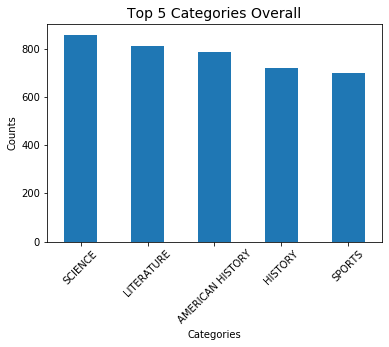

In [7]:
#plot out category values for Overall - ALL Rounds ALL air dates
title_all="Top 5 Categories Overall"
all_all = jeopardy_df.groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_all, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig14_overall.png", dpi=100, bbox_inches='tight')
plt.show()


# Comparison of Categories between Rounds 1&2 versus Final Round

### *Question #2: Do Categories Change Between Rounds 1&2 Versus The Final Round?* 

Since Jeopardy does get more difficult from rounds 1 & 2 to the final round, do the categories follow with the overall or do they become more difficult? The top 4 of the rounds 1 & 2 are the same as the overall (Science, Literature, American History, History) with the addition of Potpourri (inplace of Sports on the overall). Also see plot. Rounds 1 & 2 also have the most numerous questions. The top category of Science in rounds 1 & 2 is also 2% of the total. 

The final round overall category is US Presidents. See Plot. It is 2.6% of the total categories in the final round. The other top 5 categories are: Word Origins, State Capitols, Authors & The Oscars. These categories appear more focused as compared to big topics of rounds 1 & 2 like science or history, which makes sense for the more difficult/higher value questions. 

In [8]:
#pull out rows for rounds 1 & 2 (all air dates) by using groupby & to find top 5 categories with total count
early_all = early_df.groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_all = len(early_df.groupby("category"))
print(early_all)
print("Total Category Count is: ",count_all)

                  round
category               
SCIENCE             849
LITERATURE          798
AMERICAN HISTORY    755
HISTORY             716
POTPOURRI           699
Total Category Count is:  41881


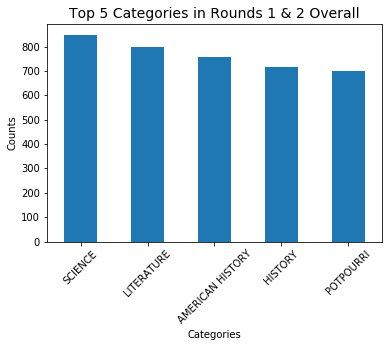

In [9]:
#plot out category values for rounds 1 & 2 (all air dates)
title_eall="Top 5 Categories in Rounds 1 & 2 Overall"
early_all = early_df.groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_eall, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig15_all_R1.png", dpi=100, bbox_inches='tight')
plt.show()

In [10]:
#pull out rows for final round (all air dates) by using groupby & to find top 5 categories with total count
final_all = finals_df.groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_fall = len(finals_df.groupby("category"))
print(final_all)
print("Total Category Count is: ",count_fall)

                 round
category              
U.S. PRESIDENTS     75
WORD ORIGINS        55
STATE CAPITALS      53
AUTHORS             48
THE OSCARS          43
Total Category Count is:  2878


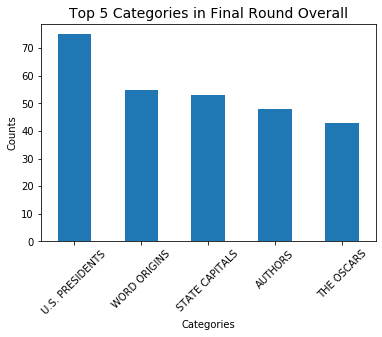

In [11]:
#plot out category values for Final Round (3) for all air dates
title_fall="Top 5 Categories in Final Round Overall"
final_all = finals_df.groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_fall, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig16_all_R3.png", dpi=100, bbox_inches='tight')
plt.show()

# Comparison of Categories between the Decades

### *Question #3: Do Categories Change Between the 4 decades of the show airing (1984-2019)?*

The air dates were divided into the decades (80s, 90s, 2000s, & 2010s), categories were then tallied & plotted to determine if there were any differences. <br>
The 80s (1984-1989) top 5 categories were: Sports, Science, Business & Industry, US History, Animals <br>
The 90s (1990-1999) top 5 categories were: Literature, World Geography, History, Science, American History <br>
The 2000s (2000-2009) top 5 categories were: Before & After, Stupid Answers, Word Origins, Bodies of Water, Science <br>
The 2010s (2010-2019) top 5 categories were: American History, Nonfiction, Word Origins, Potpourri, Pop Culture <br>
<br>
The decades mostly follow the overall categories of science, history, literature. The outlier decade that was different was the 2000s (2000-2009) with the categories of "Before & After" and "Stupid Answers". These represent the popular trends of those years. The "Before & After" category was 2% of that decade's categories, compared with: 80s top "Sports" with 11%, 90s top "Literature" with 5%, 2010s top "American History" was almost 1%. <br>
One conclusion could be that when the show started airing the categories were more general and as the years progressed, more specific categories were constructed to test the knowledge of the contestants. The percentage of the top categories show this by the lower numbers in the 2000s and 2010s. 


# 1984-1989 Categories

In [12]:
#pull out rows from air dates in 1984-1989 ALL rounds & to find top 5 categories with total count
all_80_list = jeopardy_df['1984':'1989'].groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_80_all = len(jeopardy_df['1984':'1989'].groupby("category"))
print(all_80_list)
print("Total Category Count is: ", count_80_all)

                     round
category                  
SPORTS                 288
SCIENCE                205
BUSINESS & INDUSTRY    178
U.S. HISTORY           173
ANIMALS                169
Total Category Count is:  2700


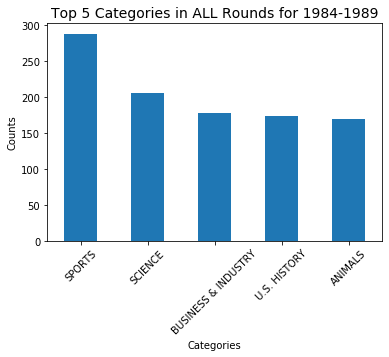

In [13]:
#plot out category values from air dates in 1984-1989 for ALL rounds
title_all80="Top 5 Categories in ALL Rounds for 1984-1989"
all_80 = jeopardy_df['1984':'1989'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_all80, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig9_80s_all.png", dpi=100, bbox_inches='tight')
plt.show()

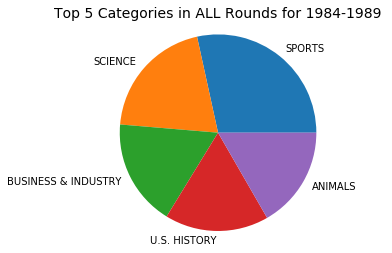

In [14]:
#pie plot of category values from air dates in 1984-1989 for ALL rounds
title_pall80="Top 5 Categories in ALL Rounds for 1984-1989"
all_p80 = jeopardy_df['1984':'1989'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="pie", subplots=True, rot=45, legend=False)
plt.title(title_all80, fontsize=14)
plt.axis("equal")
#plt.xlabel('Categories')
plt.ylabel(' ')
plt.savefig(f"ML_output/ML_fig9_80s_all_pie.png", dpi=100, bbox_inches='tight')
plt.show()

#### Comparison within the 80s of round 1&2 versus final round categories: 

80s Round 1 & 2 top 5: Sports, Science, US History, Animals, Business & Industry (same categories as 80s all rounds but in different order) <br>
80s Final Round top 5: The Oscars, Business & Industry, State Capitols, Monarchs, US Presidents


In [15]:
#pull out rows from air dates in 1984-1989 for rounds 1 & 2 by using groupby & to find top 5 categories with total count
early_80 = early_df['1984':'1989'].groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_80 = len(early_df['1984':'1989'].groupby("category"))
print(early_80)
print("Total Category Count is: ",count_80)

                     round
category                  
SPORTS                 283
SCIENCE                203
U.S. HISTORY           169
ANIMALS                166
BUSINESS & INDUSTRY    165
Total Category Count is:  2633


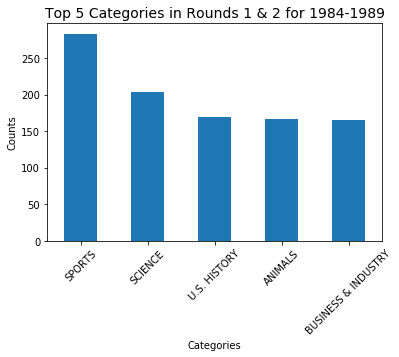

In [16]:
#plot category values from air dates in 1984-1989 for rounds 1 & 2 
title_80="Top 5 Categories in Rounds 1 & 2 for 1984-1989"
early_80 = early_df['1984':'1989'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_80, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig1_80s_R1.png", dpi=100, bbox_inches='tight')
plt.show()


In [17]:
#pull out rows from air dates in 1984-1989 for final round by using groupby & to find top 5 categories with total count
final_80 = finals_df['1984':'1989'].groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_f80 = len(finals_df['1984':'1989'].groupby("category"))
print(final_80)
print("Total Category Count is: ",count_f80)
  

                     round
category                  
THE OSCARS              15
BUSINESS & INDUSTRY     13
STATE CAPITALS          11
MONARCHS                 9
U.S. PRESIDENTS          9
Total Category Count is:  265


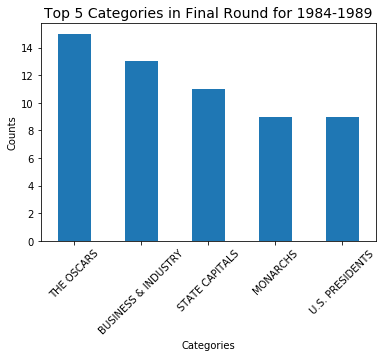

In [18]:
#plot category values from air dates in 1984-1989 for Final Round
title_f80="Top 5 Categories in Final Round for 1984-1989"
final_80 = finals_df['1984':'1989'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_f80, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig2_80s_R3.png", dpi=100, bbox_inches='tight')
plt.show()

# 1990-1999 Categories

In [19]:
#pull out rows from air dates in 1990-1994 ALL rounds & to find top 5 categories with total count
all_90_list = jeopardy_df['1990':'1999'].groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_90_all = len(jeopardy_df['1990':'1999'].groupby("category"))
print(all_90_list)
print("Total Category Count is: ", count_90_all)

                  round
category               
LITERATURE          411
WORLD GEOGRAPHY     386
HISTORY             377
SCIENCE             368
AMERICAN HISTORY    362
Total Category Count is:  7659


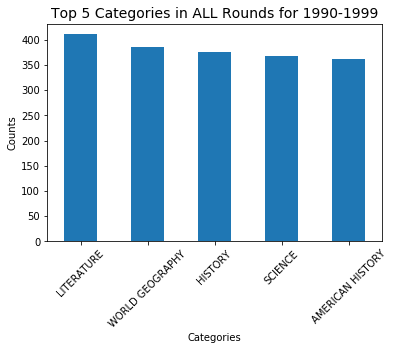

In [20]:
#plot out category values from air dates in 1990-1999 for ALL Rounds
title_all90="Top 5 Categories in ALL Rounds for 1990-1999"
all_90 = jeopardy_df['1990':'1999'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_all90, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig10_90s_all.png", dpi=100, bbox_inches='tight')
plt.show()

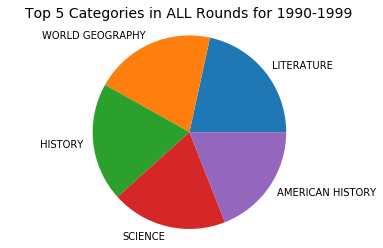

In [21]:
#pie plot of category values from air dates in 1990-1999 for ALL Rounds
title_pall90="Top 5 Categories in ALL Rounds for 1990-1999"
all_p90 = jeopardy_df['1990':'1999'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="pie", subplots=True, rot=45, legend=False)
plt.title(title_all90, fontsize=14)
plt.axis("equal")
#plt.xlabel('Categories')
plt.ylabel(' ')
plt.savefig(f"ML_output/ML_fig10_90s_all_pie.png", dpi=100, bbox_inches='tight')
plt.show()

#### Comparison within the 90s of round 1&2 versus final round categories:

90s Round 1 & 2 top 5: Literature, World Geography, History, Science, American History (same categories as 90s all rounds) <br>
90s Final Round top 5: US Presidents, Business & Industry, State Capitols, Famous Names, Countries of the World


In [22]:
#pull out rows from air dates in 1990-1999 for rounds 1 & 2 by using groupby & to find top 5 categories with total count
early_90 = early_df['1990':'1999'].groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_90 = len(early_df['1990':'1999'].groupby("category"))
print(early_90)
print("Total Category Count is: ",count_90)

                  round
category               
LITERATURE          408
WORLD GEOGRAPHY     378
HISTORY             375
SCIENCE             366
AMERICAN HISTORY    351
Total Category Count is:  7358


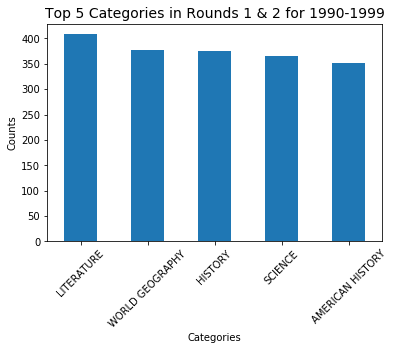

In [23]:
#plot category values from air dates in 1990-1999 for rounds 1 & 2 
title_90="Top 5 Categories in Rounds 1 & 2 for 1990-1999"
early_90 = early_df['1990':'1999'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_90, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig3_90s_R1.png", dpi=100, bbox_inches='tight')
plt.show()


In [24]:
#pull out rows from air dates in 1990-1999 for final round by using groupby & to find top 5 categories with total count
final_90 = finals_df['1990':'1999'].groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_f90 = len(finals_df['1990':'1999'].groupby("category"))
print(final_90)
print("Total Category Count is: ",count_f90)
  

                        round
category                     
U.S. PRESIDENTS            28
BUSINESS & INDUSTRY        17
STATE CAPITALS             14
FAMOUS NAMES               14
COUNTRIES OF THE WORLD     13
Total Category Count is:  687


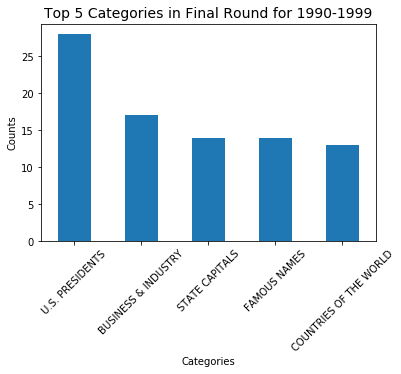

In [25]:
#plot out category values from air dates in 1990-1999 for Final Round (3)
title_f90="Top 5 Categories in Final Round for 1990-1999"
final_90 = finals_df['1990':'1999'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_f90, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig4_90s_R3.png", dpi=100, bbox_inches='tight')
plt.show()

# 2000-2009 Categories

In [26]:
#pull out rows from air dates in 2000-2009 ALL rounds & to find top 5 categories with total count
all_00_list = jeopardy_df['2000':'2009'].groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_00_all = len(jeopardy_df['2000':'2009'].groupby("category"))
print(all_00_list)
print("Total Category Count is: ", count_00_all)

                 round
category              
BEFORE & AFTER     420
STUPID ANSWERS     187
WORD ORIGINS       185
BODIES OF WATER    178
SCIENCE            178
Total Category Count is:  19601


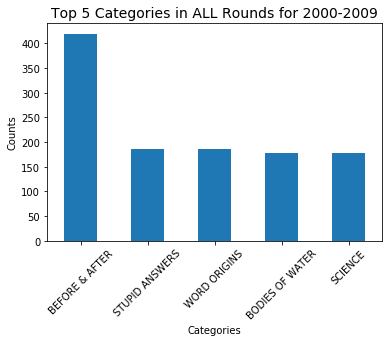

In [27]:
#plot out category values from air dates in 2000-2009 for ALL Rounds
title_all00="Top 5 Categories in ALL Rounds for 2000-2009"
all_00 = jeopardy_df['2000':'2009'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_all00, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig11_00s_all.png", dpi=100, bbox_inches='tight')
plt.show()

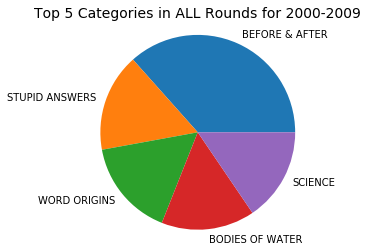

In [28]:
#pie plot of category values from air dates in 2000-2009 for ALL Rounds
title_pall00="Top 5 Categories in ALL Rounds for 2000-2009"
all_p00 = jeopardy_df['2000':'2009'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="pie", subplots=True, rot=45, legend=False)
plt.title(title_pall00, fontsize=14)
plt.axis("equal")
#plt.xlabel('Categories')
plt.ylabel(' ')
plt.savefig(f"ML_output/ML_fig11_00s_all_pie.png", dpi=100, bbox_inches='tight')
plt.show()

#### Comparison within the 2000s of round 1&2 versus final round categories: 

2000s Round 1 & 2 top 5: Before & After, Stupid Answers, Science, Bodies of Water, Rhyme Time (similar categories as 2000s all rounds) <br>
2000s Final Round top 5: Word Origins, US Presidents, State Capitals, Famous Americans, Historic Names


In [29]:
#pull out rows from air dates in 2000-2009 for rounds 1 & 2 by using groupby & to find top 5 categories with total count
early_00 = early_df['2000':'2009'].groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_00 = len(early_df['2000':'2009'].groupby("category"))
print(early_00)
print("Total Category Count is: ",count_00)

                 round
category              
BEFORE & AFTER     420
STUPID ANSWERS     187
SCIENCE            173
BODIES OF WATER    173
RHYME TIME         170
Total Category Count is:  18761


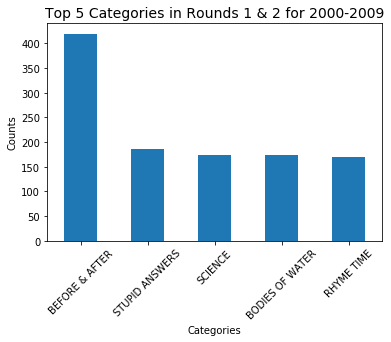

In [30]:
#plot out category values from air dates in 2000-2009 for rounds 1 & 2 
title_00="Top 5 Categories in Rounds 1 & 2 for 2000-2009"
early_00 = early_df['2000':'2009'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_00, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig5_00s_R1.png", dpi=100, bbox_inches='tight')
plt.show()


In [31]:
#pull out rows from air dates in 2000-2009 for final round by using groupby & to find top 5 categories with total count
final_00 = finals_df['2000':'2009'].groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_f00 = len(finals_df['2000':'2009'].groupby("category"))
print(final_00)
print("Total Category Count is: ",count_f00)

                  round
category               
WORD ORIGINS         23
U.S. PRESIDENTS      21
STATE CAPITALS       21
FAMOUS AMERICANS     17
HISTORIC NAMES       15
Total Category Count is:  1404


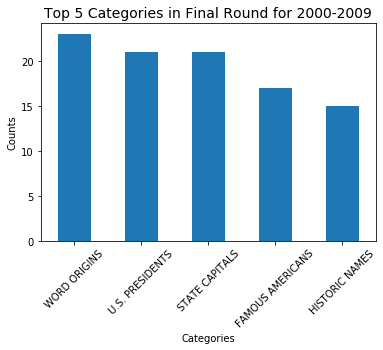

In [32]:
#plot out category values from air dates in 2000-2009 for Final Round (3)
title_f00="Top 5 Categories in Final Round for 2000-2009"
final_00 = finals_df['2000':'2009'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_f00, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig6_00s_R3.png", dpi=100, bbox_inches='tight')
plt.show()

# 2010-2019 Categories

In [33]:
#pull out rows from air dates in 2010-2019 ALL rounds & to find top 5 categories with total count
all_10_list = jeopardy_df['2010':'2019'].groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_10_all = len(jeopardy_df['2010':'2019'].groupby("category"))
print(all_10_list)
print("Total Category Count is: ", count_10_all)

                  round
category               
AMERICAN HISTORY    185
NONFICTION          165
WORD ORIGINS        151
POTPOURRI           149
POP CULTURE         123
Total Category Count is:  21434


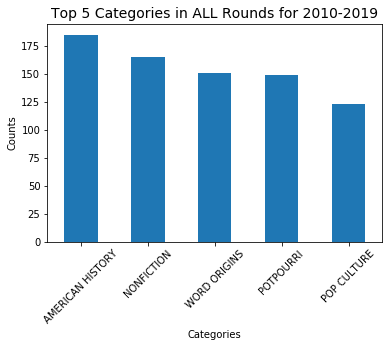

In [34]:
#plot out category values from air dates in 2010-2019 for ALL Rounds
title_all10="Top 5 Categories in ALL Rounds for 2010-2019"
all_10 = jeopardy_df['2010':'2019'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_all10, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig12_10s_all.png", dpi=100, bbox_inches='tight')
plt.show()

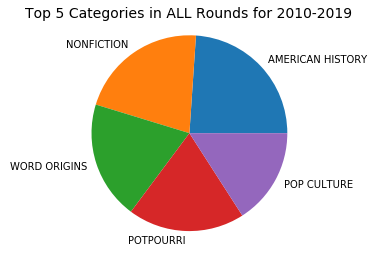

In [35]:
#pie plot of category values from air dates in 2010-2019 for ALL Rounds
title_pall10="Top 5 Categories in ALL Rounds for 2010-2019"
all_p10 = jeopardy_df['2010':'2019'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="pie", subplots= True, rot=45, legend=False)
plt.title(title_pall10, fontsize=14)
plt.axis("equal")
#plt.xlabel('Categories')
plt.ylabel(' ')
plt.savefig(f"ML_output/ML_fig12_10s_all_pie.png", dpi=100, bbox_inches='tight')
plt.show()

#### Comparison within the 2010s of round 1&2 versus final round categories:

2010s Round 1 & 2 top 5: American History, Nonfiction, Potpourri, Word Origins, Pop Culture (same categories as 2010s all rounds, slightly different order) <br>
2010s Final Round top 5: Authors, US Presidents, Word Origins, Americana, The Oscars


In [36]:
#pull out rows from air dates in 2010-2019 for rounds 1 & 2 by using groupby & to find top 5 categories with total count
early_10 = early_df['2010':'2019'].groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_10 = len(early_df['2010':'2019'].groupby("category"))
print(early_10)
print("Total Category Count is: ",count_10)

                  round
category               
AMERICAN HISTORY    177
NONFICTION          164
POTPOURRI           149
WORD ORIGINS        135
POP CULTURE         123
Total Category Count is:  20549


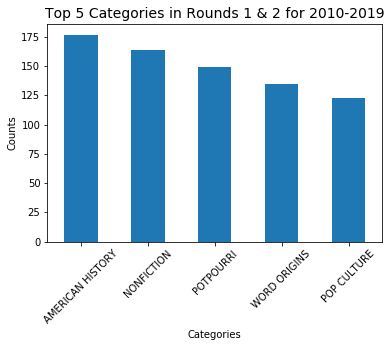

In [37]:
#plot out category values from air dates in 2010-2019 for rounds 1 & 2 
title_10="Top 5 Categories in Rounds 1 & 2 for 2010-2019"
early_10 = early_df['2010':'2019'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_10, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig7_10s_R1.png", dpi=100, bbox_inches='tight')
plt.show()


In [38]:
#pull out rows from air dates in 2010-2019 for final round by using groupby & to find top 5 categories with total count
final_10 = finals_df['2010':'2019'].groupby('category').count().sort_values('round', 
        ascending=False).head(5)
count_f10 = len(finals_df['2010':'2019'].groupby("category"))
print(final_10)
print("Total Category Count is: ",count_f10)

                 round
category              
AUTHORS             20
U.S. PRESIDENTS     17
WORD ORIGINS        16
AMERICANA           15
THE OSCARS          15
Total Category Count is:  1433


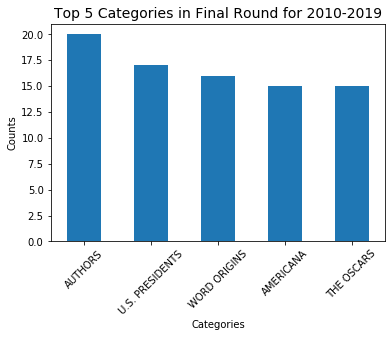

In [39]:
#plot out category values from air dates in 2010-2019 for Final Round (3)
title_f10="Top 5 Categories in Final Round for 2010-2019"
final_10 = finals_df['2010':'2019'].groupby('category').count().sort_values('round', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_f10, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig8_10s_R3.png", dpi=100, bbox_inches='tight')
plt.show()

# Daily Double Comparison

An additional comparision of what categories were most often seen the in the Daily Double questions. <br>
The top 5 Daily Double categories: American History, World History, Science, World Geography, Literature <br>
(similar to overall categories)


In [40]:
#pull out daily doubles into separate dataframe
double_df = jeopardy_adult_df.loc[jeopardy_adult_df["daily_double"] == "yes"]
double_df.head()

round  value daily_double        category comments  \
44       2   1000          yes  4-LETTER WORDS        -   
69       1    400          yes  BY THE NUMBERS        -   
107      1    400          yes     AUTOMOBILES        -   
126      2   1500          yes   NEW TESTAMENT        -   
179      2   3500          yes         ANATOMY        -   

                                                answer         question  \
44   It's the first 4-letter word in "The Star Span...             what   
69             Total of Disney's Dalmatians and dwarfs              108   
107  Models of Ford, Chrysler, & Cadillac are all n...            Spain   
126  \"Blessed are" these "for they shall be called...  the peacemakers   
179  Prominent zygomatic bones, considered an attra...      cheek bones   

       air_date notes  
44   1984-09-10     -  
69   1984-09-11     -  
107  1984-09-12     -  
126  1984-09-12     -  
179  1984-09-13     -

In [41]:
#delete un-needed columns for daily doubles
double_df.drop('comments', axis=1, inplace=True)
double_df.drop('notes', axis=1, inplace=True)
double_df.drop('value', axis=1, inplace=True)
double_df.drop('answer', axis=1, inplace=True)
double_df.drop('question', axis=1, inplace=True)
double_df.drop('round', axis=1, inplace=True)
double_df.drop('air_date', axis=1, inplace=True)

double_df.head()


C:\Anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


daily_double        category
44           yes  4-LETTER WORDS
69           yes  BY THE NUMBERS
107          yes     AUTOMOBILES
126          yes   NEW TESTAMENT
179          yes         ANATOMY

In [42]:
#pull out category values for all Daily Doubles
double_all = double_df.groupby('category').count().sort_values('daily_double', 
        ascending=False).head(5)
count_double = len(double_df.groupby("category"))
print(double_all)
print("Total Category Count is: ",count_double)

                  daily_double
category                      
AMERICAN HISTORY            58
WORLD HISTORY               56
SCIENCE                     55
WORLD GEOGRAPHY             54
LITERATURE                  52
Total Category Count is:  11119


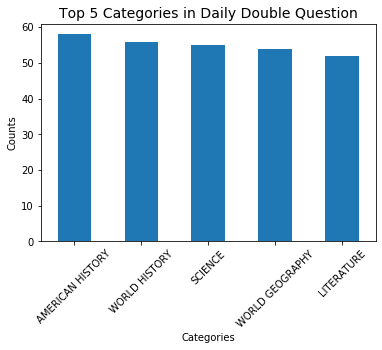

In [43]:
#plot out category values for all Daily Doubles
title_double="Top 5 Categories in Daily Double Question"
double_10 = double_df.groupby('category').count().sort_values('daily_double', 
        ascending=False).head(5).plot(kind ="bar", rot=45, legend=False)
plt.title(title_double, fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.savefig(f"ML_output/ML_fig13_double_all.png", dpi=100, bbox_inches='tight')
plt.show()